20213043 이세현

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import requests

In [6]:
with open("example_index", "wb") as f:
    r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_index")
    f.write(r.content)
with open("example_arcs", "wb") as f:
    r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_arcs")
    f.write(r.content)

In [7]:
nodes = np.loadtxt("example_index", dtype=object)[:,0]
num_nodes = nodes.shape[0]

edges = np.loadtxt("example_arcs", dtype=int)
num_edges = edges.shape[0]

print(f"num_nodes: {num_nodes} num_edges: {num_edges}")

num_nodes: 106 num_edges: 141


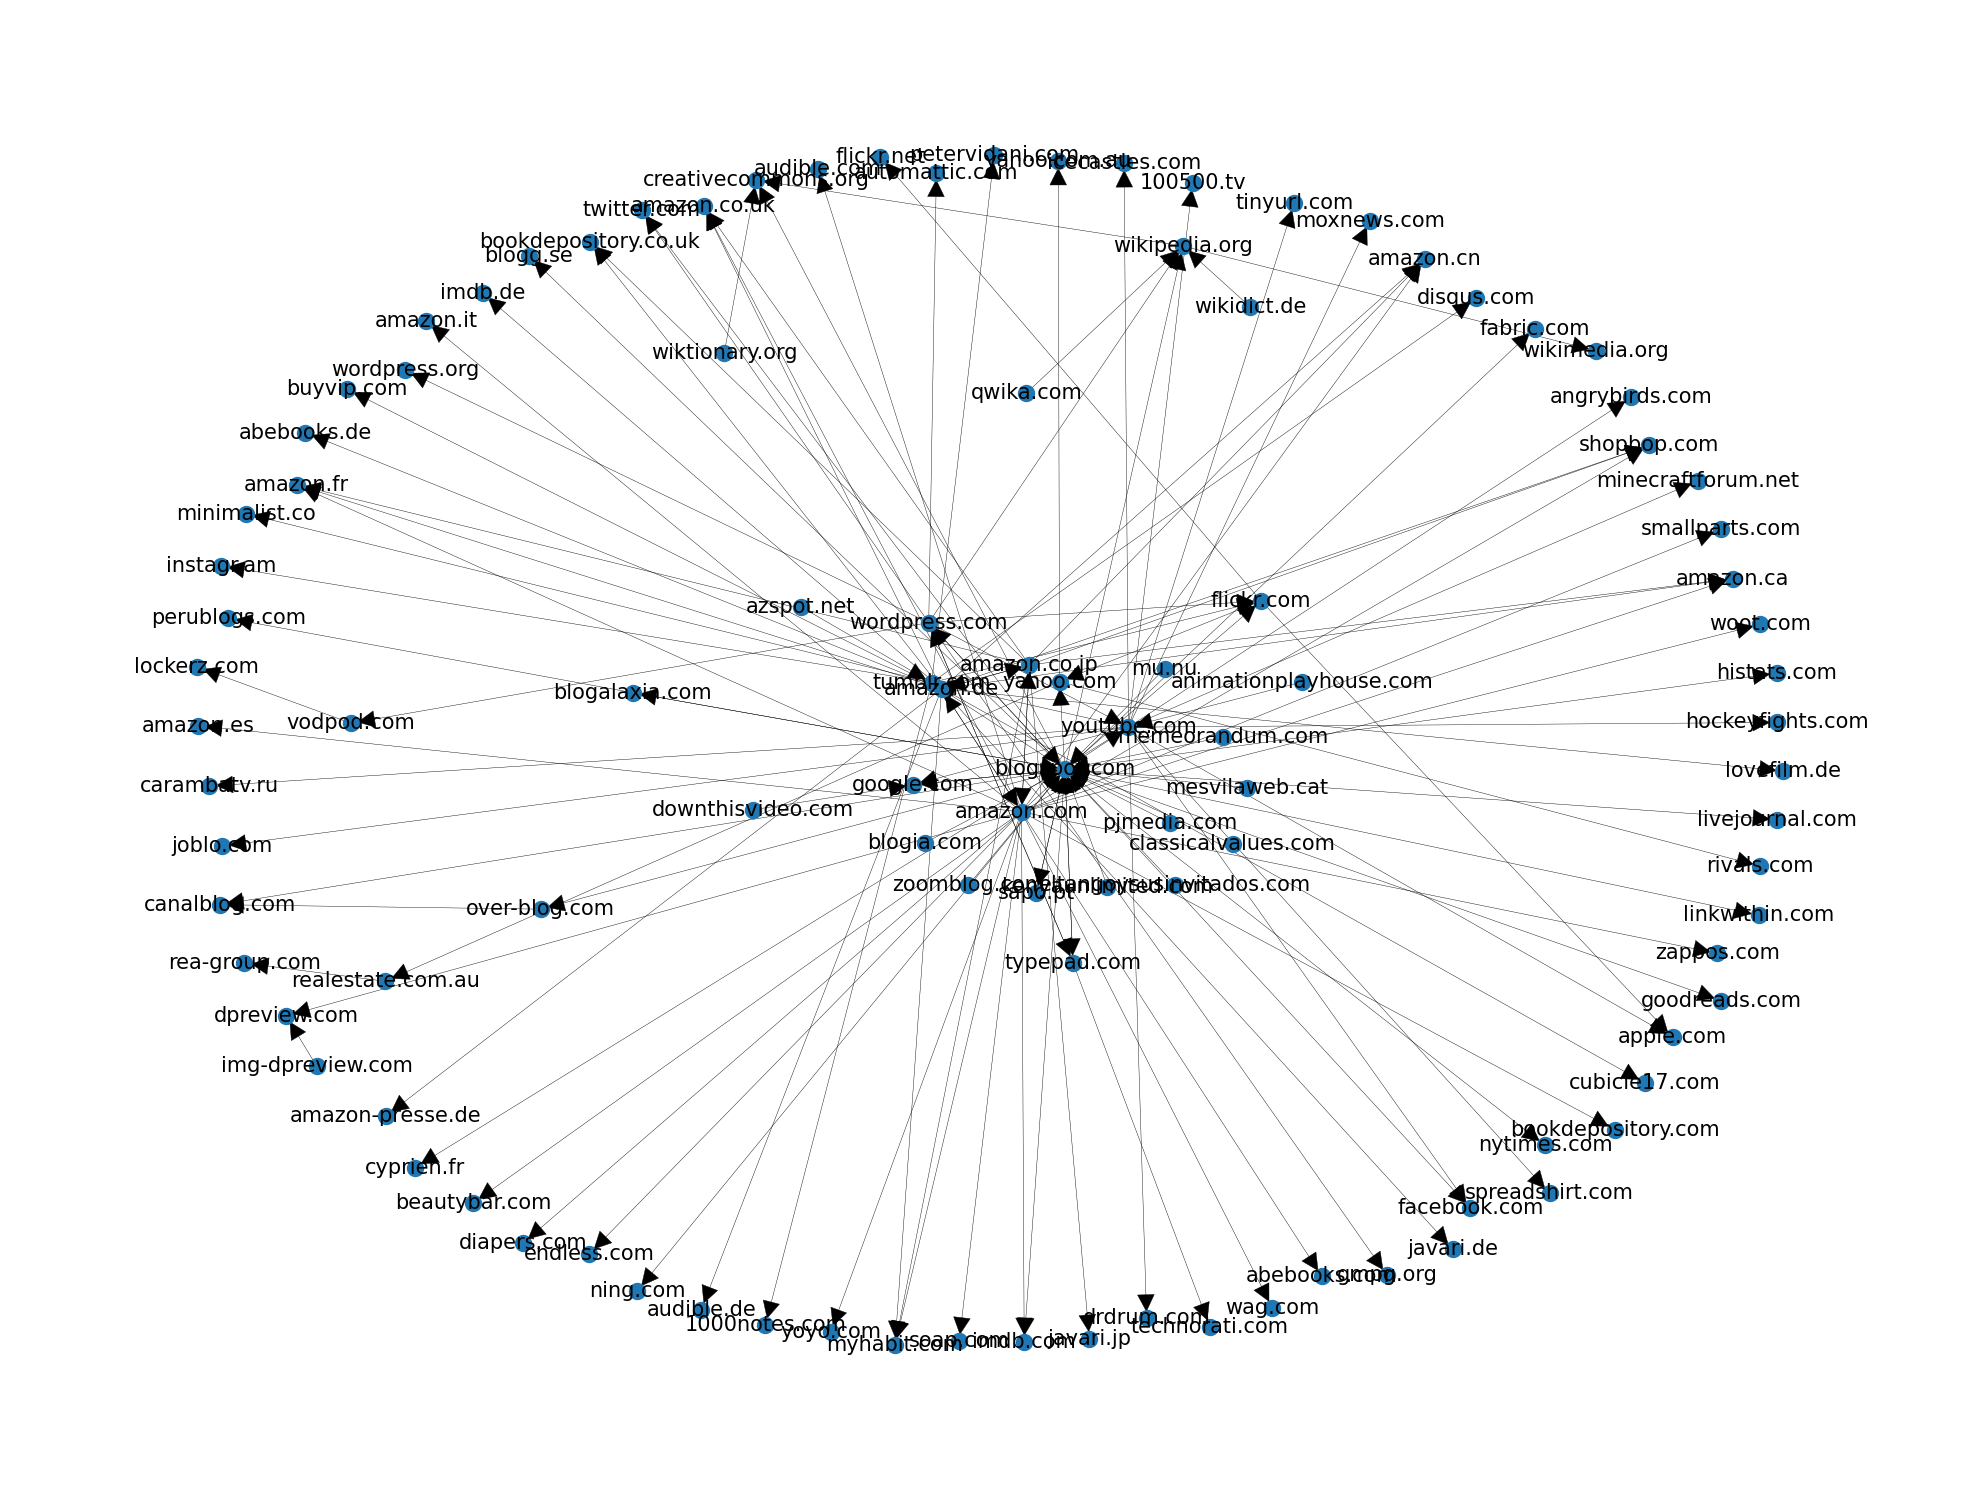

In [8]:
import networkx as nx

plt.figure(dpi=300)
G = nx.DiGraph()

for e in edges:
    G.add_edge(nodes[e[0]], nodes[e[1]])

pos = nx.spring_layout(G, k=1, iterations=200)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=5, width=0.1)

In [9]:
def pagerank(edges, beta, threshold=10^20, epochs=100):
    neighbors = [[] for _ in range(num_nodes)]

    for e in edges:
        neighbors[e[0]].append(e[1])

    r = [1/num_nodes] * num_nodes

    for epoch in range(epochs):
        r_next = [0] * num_nodes

        for u in range(num_nodes):
            for v in neighbors[u]:
                r_next[v] += (1-beta) * r[u] / len(neighbors[u])

        r_sum = sum(r_next)
        for u in range(num_nodes):
            r_next[u] /= r_sum
        
        delta = sum(abs(a-b) for a, b in zip(r, r_next))

        r = r_next
        if delta < threshold:
            break
    return r

In [10]:
r = pagerank(edges, 0.15)
for score, node in sorted(zip(r, nodes), reverse=True)[:10]:
    print(f"({score:.6f}) {node}")

(0.361616) blogspot.com
(0.064954) wikipedia.org
(0.046772) creativecommons.org
(0.034651) youtube.com
(0.033514) tumblr.com
(0.033514) google.com
(0.031621) canalblog.com
(0.031515) dpreview.com
(0.030303) rea-group.com
(0.030303) lockerz.com
